Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing details of customers to predict customer response for special offer. Create confusion matrix based on above data and find<br>
a) Accuracy<br>
b) Precision<br>
c) Recall<br>
d) F-1 score<br>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv(r'breast-cancer - breast-cancer.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = pd.get_dummies(df, columns= ["diagnosis"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
X = df.iloc[:, 1:30]
y = df.iloc[:, [31,32]]

In [8]:
y

,diagnosis_B,diagnosis_M
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
564,False,True
565,False,True
566,False,True
567,False,True


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [10]:
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

In [11]:
y_pred = tree.predict(X_test)


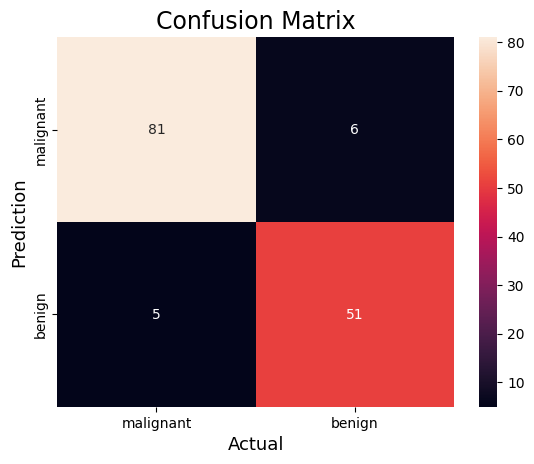

In [12]:

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy  :", accuracy)
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred,axis =1))
print("Precision :", precision)
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred,axis =1))
print("Recall    :", recall)
F1_score = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred,axis =1))
print("F1-score  :", F1_score)


Accuracy  : 0.9230769230769231
Precision : 0.8947368421052632
Recall    : 0.9107142857142857
F1-score  : 0.9026548672566371
